### 1. business understanding 

### 2.Data understanding 

#### 2.1 importer les bibliotheques 

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.cluster.hierarchy as shc #?

#### 2.2 - Load Data

In [4]:
filename = r'C:\Users\HOME\vis\student dropout.csv'
data = pd.read_csv(filename)

#### 2.3 - Explore Data

In [5]:
# Get the shape of the dataset
print("Shape of the dataset:", data.shape)

Shape of the dataset: (649, 34)


In [6]:
# View the first few rows of the dataset
print(data.head()) 

  School Gender  Age Address Family_Size Parental_Status  Mother_Education  \
0     GP      F   18       U         GT3               A                 4   
1     GP      F   17       U         GT3               T                 1   
2     GP      F   15       U         LE3               T                 1   
3     GP      F   15       U         GT3               T                 4   
4     GP      F   16       U         GT3               T                 3   

   Father_Education Mother_Job Father_Job  ... Free_Time Going_Out  \
0                 4    at_home    teacher  ...         3         4   
1                 1    at_home      other  ...         3         3   
2                 1    at_home      other  ...         3         2   
3                 2     health   services  ...         2         2   
4                 3      other      other  ...         3         2   

   Weekend_Alcohol_Consumption  Weekday_Alcohol_Consumption  Health_Status  \
0                            1  

In [7]:
# Get summary statistics of the dataset
print(data.describe())

              Age  Mother_Education  Father_Education  Travel_Time  \
count  649.000000        649.000000        649.000000   649.000000   
mean    16.744222          2.514638          2.306626     1.568567   
std      1.218138          1.134552          1.099931     0.748660   
min     15.000000          0.000000          0.000000     1.000000   
25%     16.000000          2.000000          1.000000     1.000000   
50%     17.000000          2.000000          2.000000     1.000000   
75%     18.000000          4.000000          3.000000     2.000000   
max     22.000000          4.000000          4.000000     4.000000   

       Study_Time  Number_of_Failures  Family_Relationship   Free_Time  \
count  649.000000          649.000000           649.000000  649.000000   
mean     1.930663            0.221880             3.930663    3.180277   
std      0.829510            0.593235             0.955717    1.051093   
min      1.000000            0.000000             1.000000    1.000000   

In [8]:
# Get information about the dataset, including data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School                       649 non-null    object
 1   Gender                       649 non-null    object
 2   Age                          649 non-null    int64 
 3   Address                      649 non-null    object
 4   Family_Size                  649 non-null    object
 5   Parental_Status              649 non-null    object
 6   Mother_Education             649 non-null    int64 
 7   Father_Education             649 non-null    int64 
 8   Mother_Job                   649 non-null    object
 9   Father_Job                   649 non-null    object
 10  Reason_for_Choosing_School   649 non-null    object
 11  Guardian                     649 non-null    object
 12  Travel_Time                  649 non-null    int64 
 13  Study_Time                   649 no

In [9]:
print(data['Dropped_Out'].value_counts())

Dropped_Out
False    549
True     100
Name: count, dtype: int64


##### Correlation Matrix

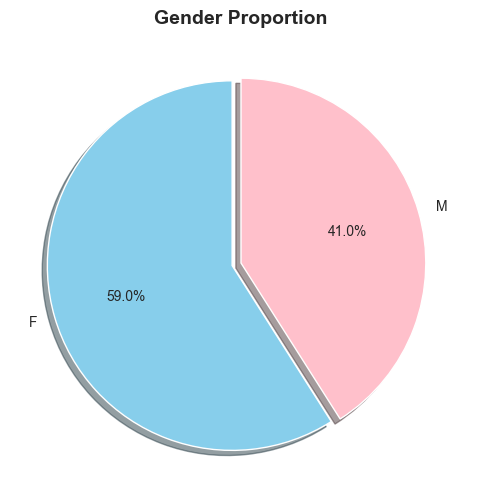

In [12]:
# Gender Proportion
plt.figure(figsize=(6, 6))
data['Gender'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    colors=['skyblue', 'pink'], 
    explode=[0.05, 0],  # Slight separation for effect
    startangle=90,
    shadow=True
)
plt.title('Gender Proportion', fontsize=14, weight='bold')
plt.ylabel('')  # Removes 'y-axis' label
plt.show()

In [16]:
print(data['Dropped_Out'].unique())

# Convert 'Dropped_Out' to numerical values (0 for False, 1 for True)
data['Dropped_Out'] = data['Dropped_Out'].astype(int)

[False  True]


In [17]:
print(data['Dropped_Out'].unique())


[0 1]


In [24]:
# Convert all non-numeric columns to numeric if needed
data_numeric = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for only numeric columns
correlation_matrix = data_numeric.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)



                                  Age  Mother_Education  Father_Education  \
Age                          1.000000         -0.107832         -0.121050   
Mother_Education            -0.107832          1.000000          0.647477   
Father_Education            -0.121050          0.647477          1.000000   
Travel_Time                  0.034490         -0.265079         -0.208288   
Study_Time                  -0.008415          0.097006          0.050400   
Number_of_Failures           0.319968         -0.172210         -0.165915   
Family_Relationship         -0.020559          0.024421          0.020256   
Free_Time                   -0.004910         -0.019686          0.006841   
Going_Out                    0.112805          0.009536          0.027690   
Weekend_Alcohol_Consumption  0.134768         -0.007018          0.000061   
Weekday_Alcohol_Consumption  0.086357         -0.019766          0.038445   
Health_Status               -0.008750          0.004614          0.044910   

In [38]:
# Get the correlation of all features with 'Dropped_Out'
target_correlation = correlation_matrix['Dropped_Out']

# Print the features that are highly correlated with 'Dropped_Out'
# You can adjust the threshold as needed, here I'm using 0.3 as an example
relevant_features = target_correlation[abs(target_correlation) > 0.3].index.tolist()

# Print the relevant features
print("\nRelevant features based on correlation with 'Dropped_Out':\n", relevant_features)



Relevant features based on correlation with 'Dropped_Out':
 ['Number_of_Failures', 'Grade_1', 'Grade_2', 'Final_Grade', 'Dropped_Out']


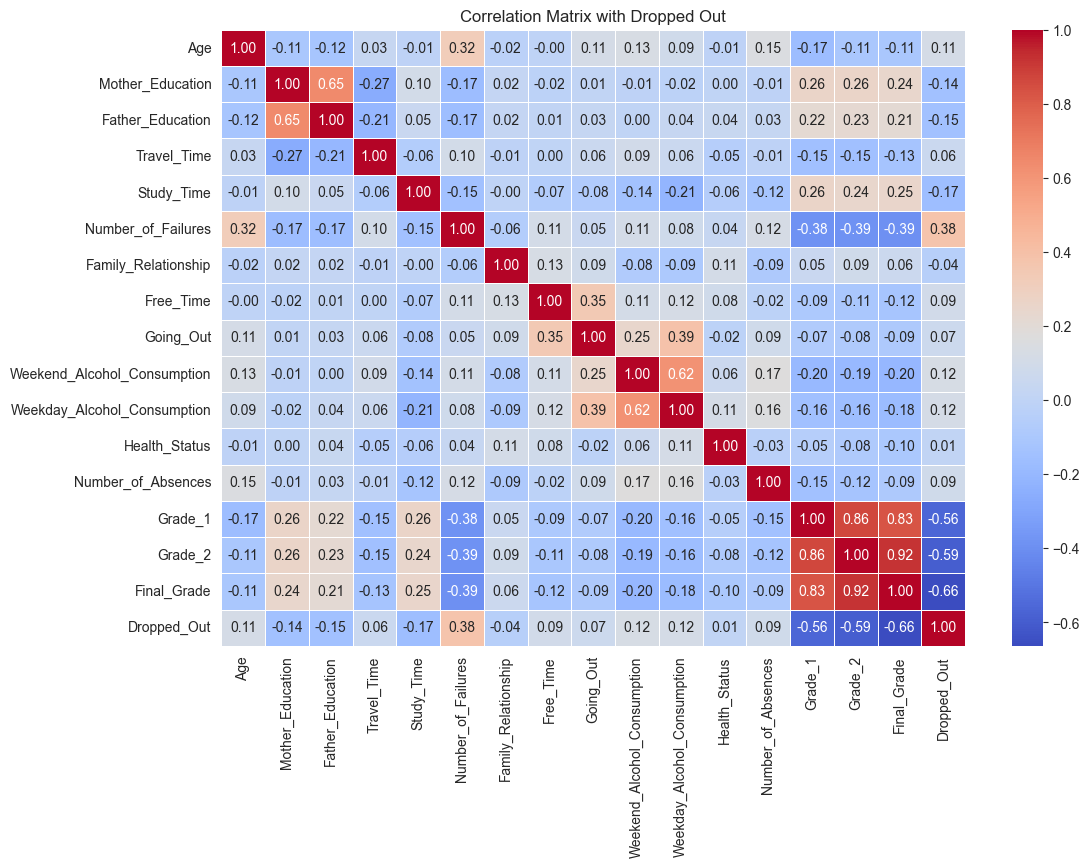

In [35]:
# Plot the correlation map
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix with Dropped Out')
plt.show()


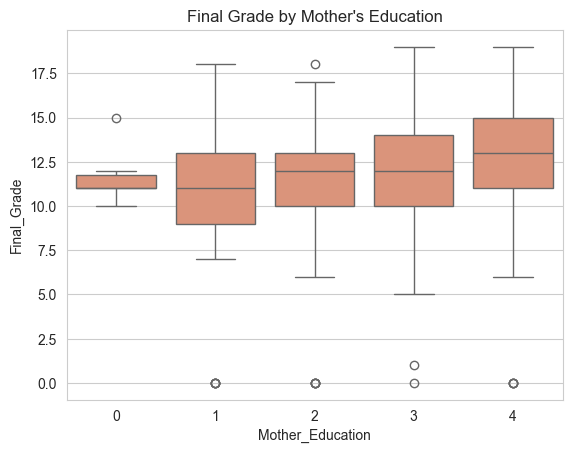

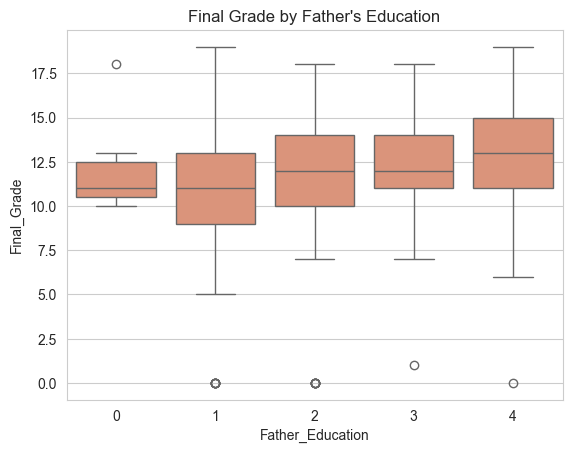

In [19]:
#Analyze how Mother_Education and Father_Education levels affect Final_Grade
sns.boxplot(x='Mother_Education', y='Final_Grade', data=data)
plt.title('Final Grade by Mother\'s Education')
plt.show()

sns.boxplot(x='Father_Education', y='Final_Grade', data=data)
plt.title('Final Grade by Father\'s Education')
plt.show()


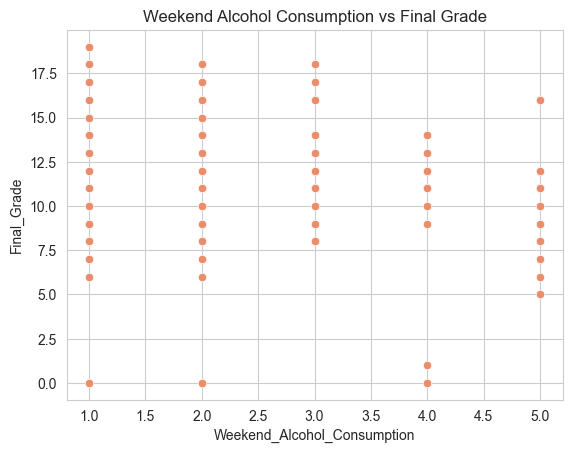

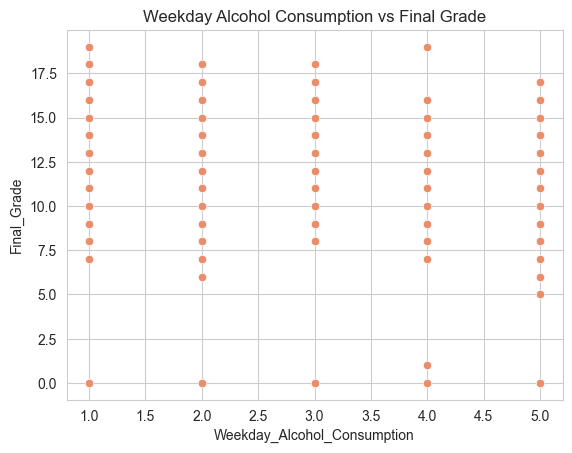

In [20]:
#Compare alcohol consumption (Weekend_Alcohol_Consumption vs. Weekday_Alcohol_Consumption) and its impact on grades 
sns.scatterplot(x='Weekend_Alcohol_Consumption', y='Final_Grade', data=data)
plt.title('Weekend Alcohol Consumption vs Final Grade')
plt.show()

sns.scatterplot(x='Weekday_Alcohol_Consumption', y='Final_Grade', data=data)
plt.title('Weekday Alcohol Consumption vs Final Grade')
plt.show()


In OUR matrix, the following columns have very low correlations (near 0) with "Dropped_Out":

Age (0.11)
Mother_Education (0.13)
Father_Education (0.09)
Travel_Time (0.12)
Study_Time (0.13)
Free_Time (-0.12)
Health_Status (0.09)
Grade_1 (-0.17)
Grade_2 (-0.18)

In [21]:
# List of columns to drop based on low correlation with "Dropped_Out"
columns_to_drop = [
    'Age', 'Mother_Education', 'Father_Education', 'Travel_Time', 
    'Study_Time', 'Free_Time', 'Health_Status', 'Grade_1', 'Grade_2','School'
]

# Drop the specified columns from the dataset
data_cleaned = data.drop(columns=columns_to_drop)



In [22]:
data_cleaned.head()

,Gender,Address,Family_Size,Parental_Status,Mother_Job,Father_Job,Reason_for_Choosing_School,Guardian,Number_of_Failures,School_Support,...,Wants_Higher_Education,Internet_Access,In_Relationship,Family_Relationship,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Number_of_Absences,Final_Grade,Dropped_Out
0,F,U,GT3,A,at_home,teacher,course,mother,0,yes,...,yes,no,no,4,4,1,1,4,11,0
1,F,U,GT3,T,at_home,other,course,father,0,no,...,yes,yes,no,5,3,1,1,2,11,0
2,F,U,LE3,T,at_home,other,other,mother,0,yes,...,yes,yes,no,4,2,2,3,6,12,0
3,F,U,GT3,T,health,services,home,mother,0,no,...,yes,yes,yes,3,2,1,1,0,14,0
4,F,U,GT3,T,other,other,home,father,0,no,...,yes,no,no,4,2,1,2,0,13,0


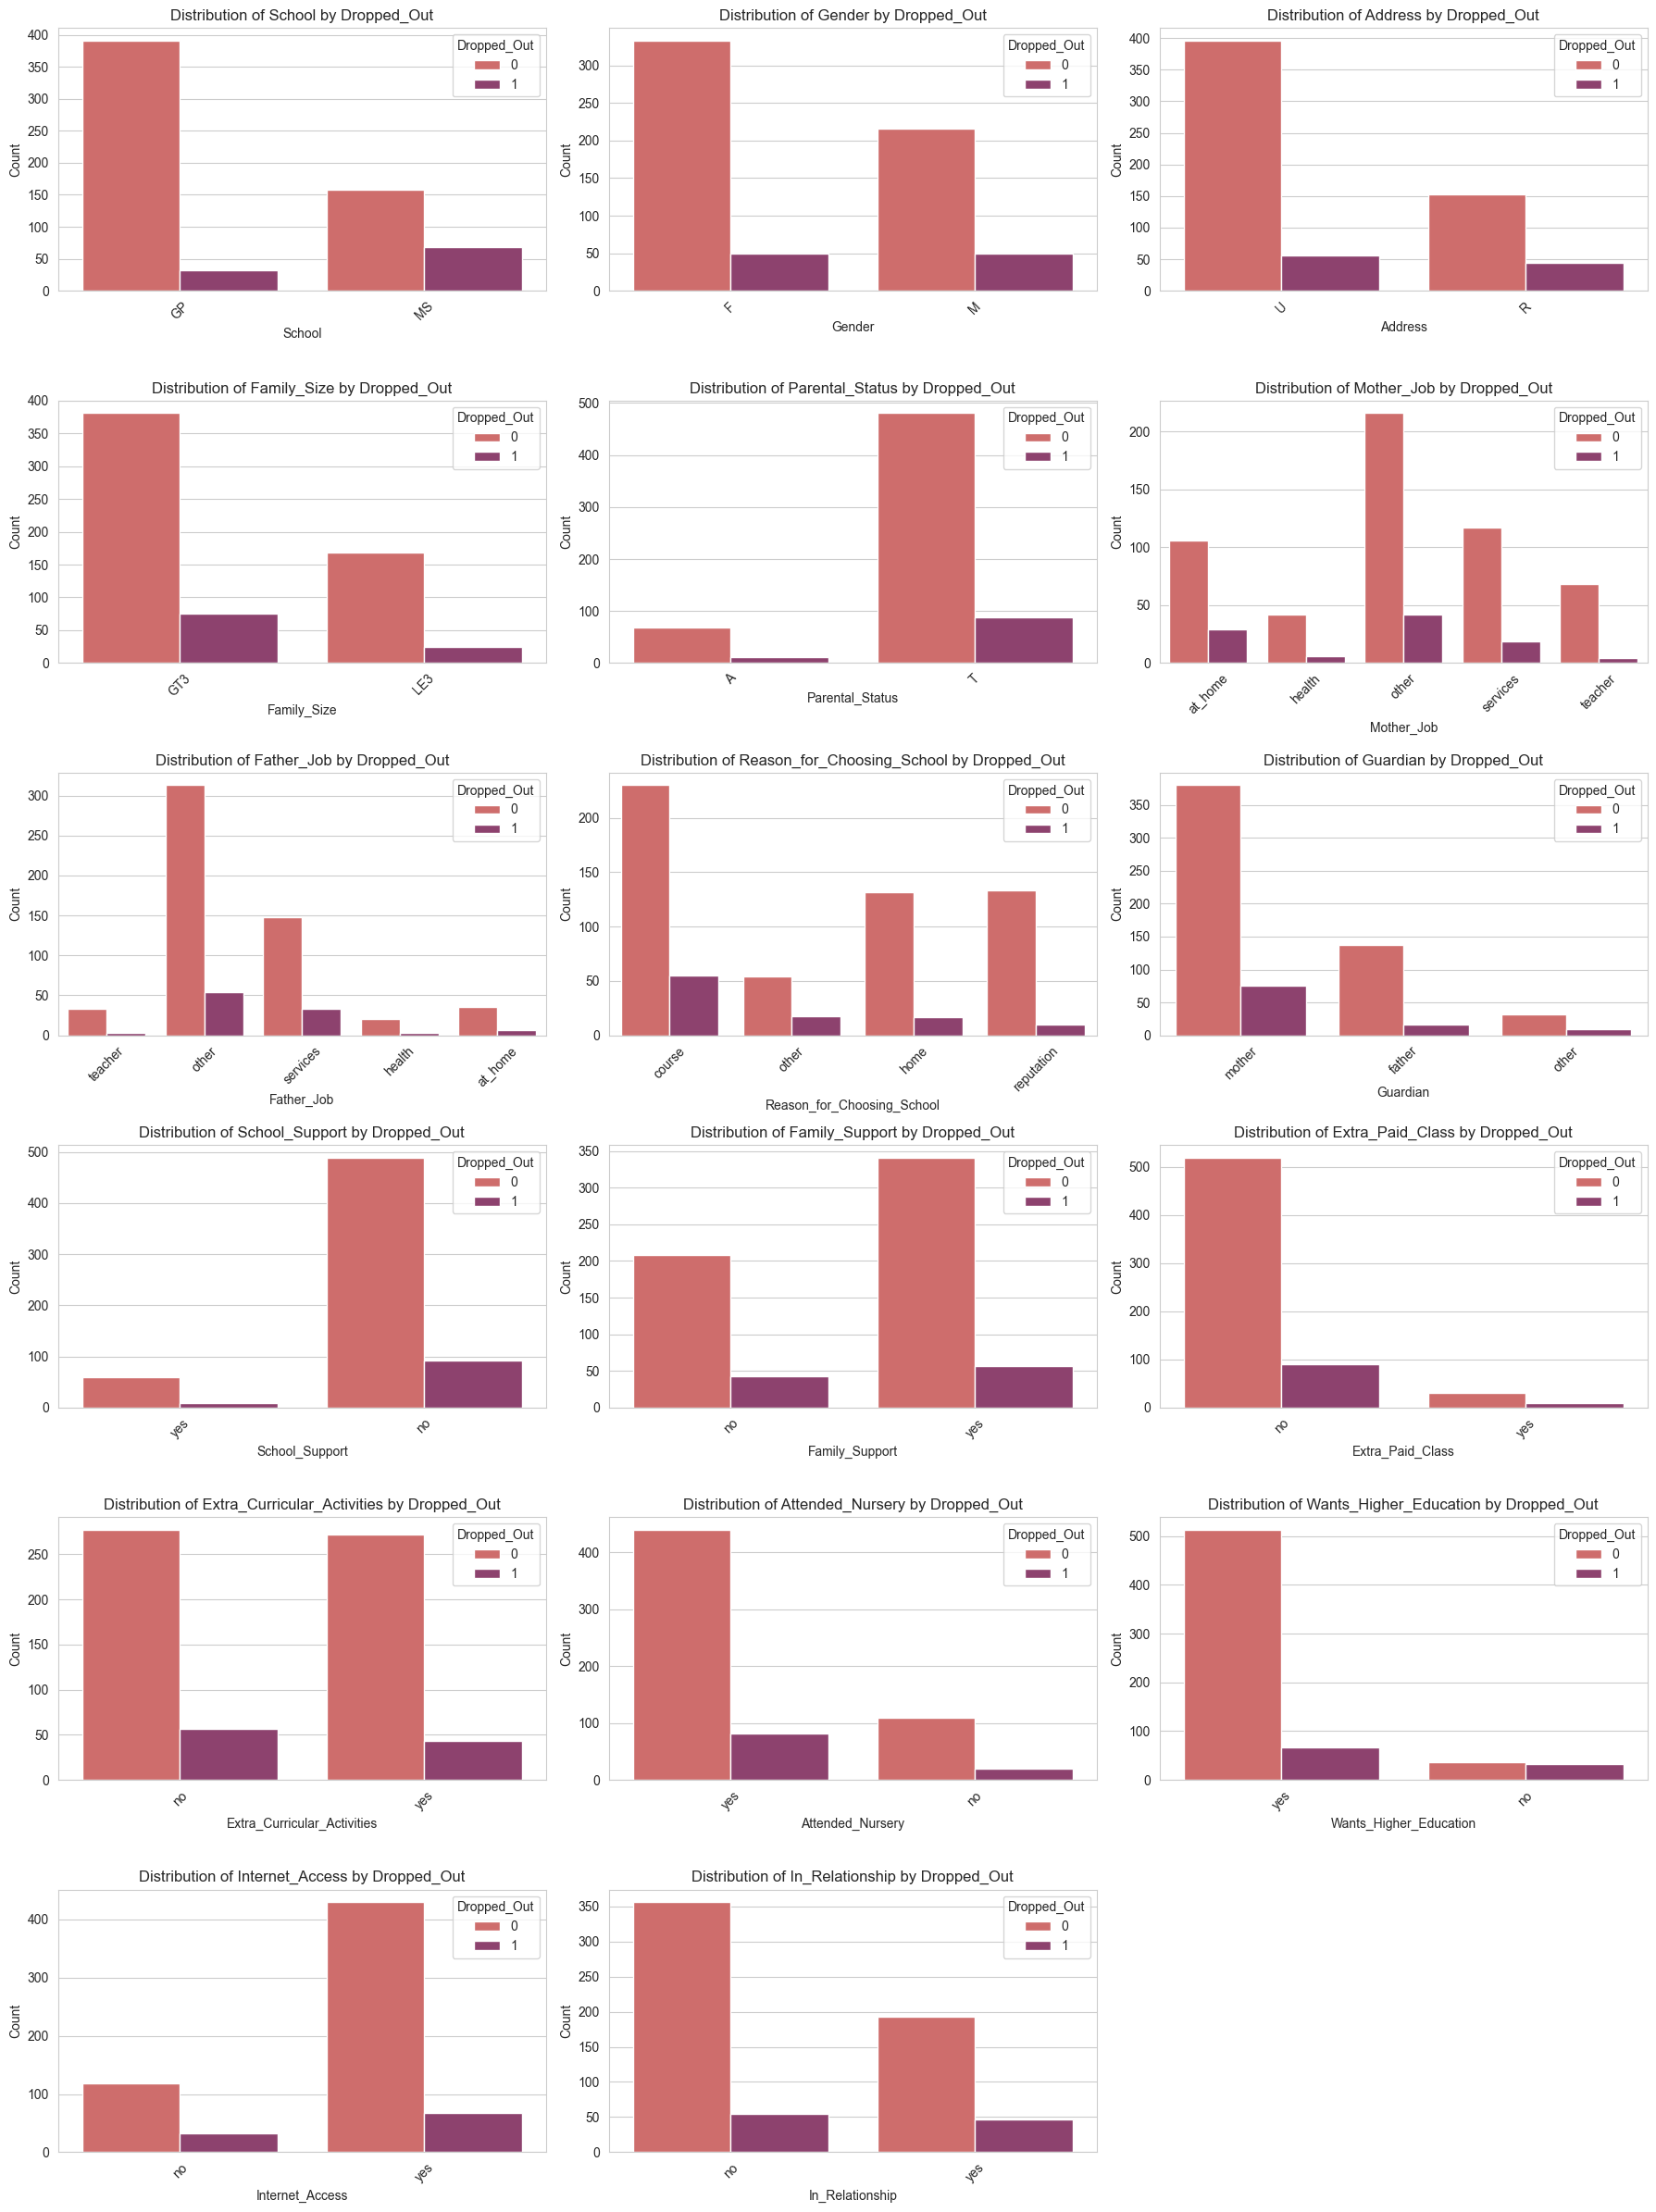

In [26]:
# Filter categorical (object) and boolean columns
categorical_columns = data.select_dtypes(include=['object', 'bool']).columns

# Define the number of subplots
num_cols = len(categorical_columns)
nrows = (num_cols + 2) // 3  # Create rows of 3 plots each

# Set the color palette (hot colors)
sns.set_palette("flare")

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(18, 4 * nrows))
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(
        data=data,
        x=col,
        hue="Dropped_Out",
        ax=ax,
        palette="flare"
    )
    ax.set_title(f"Distribution of {col} by Dropped_Out")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.legend(title="Dropped_Out")
    ax.tick_params(axis="x", rotation=45)

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [28]:
from scipy.stats import chi2_contingency

# Function to compute Chi-Square test for each categorical column
def chi_square_test(data, target, categorical_columns):
    significant_features = []
    for col in categorical_columns:
        contingency_table = pd.crosstab(data[col], data[target])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Feature: {col}")
        print(f"Chi-Square Statistic: {chi2:.4f}, P-value: {p:.4f}\n")
        
        if p < 0.05:
            significant_features.append(col)
    
    return significant_features

# Perform the Chi-Square test
significant_features = chi_square_test(data, "Dropped_Out", categorical_columns)

#Features with p < 0.05 are considered significant and relevant to the target.
print("Significant Features Associated with Dropped_Out:")
print(significant_features)


Feature: School
Chi-Square Statistic: 55.6164, P-value: 0.0000

Feature: Gender
Chi-Square Statistic: 3.5427, P-value: 0.0598

Feature: Address
Chi-Square Statistic: 9.6631, P-value: 0.0019

Feature: Family_Size
Chi-Square Statistic: 1.4667, P-value: 0.2259

Feature: Parental_Status
Chi-Square Statistic: 0.0000, P-value: 1.0000

Feature: Mother_Job
Chi-Square Statistic: 9.8599, P-value: 0.0429

Feature: Father_Job
Chi-Square Statistic: 2.7752, P-value: 0.5961

Feature: Reason_for_Choosing_School
Chi-Square Statistic: 17.9882, P-value: 0.0004

Feature: Guardian
Chi-Square Statistic: 4.6273, P-value: 0.0989

Feature: School_Support
Chi-Square Statistic: 0.4929, P-value: 0.4826

Feature: Family_Support
Chi-Square Statistic: 0.7293, P-value: 0.3931

Feature: Extra_Paid_Class
Chi-Square Statistic: 1.2985, P-value: 0.2545

Feature: Extra_Curricular_Activities
Chi-Square Statistic: 1.2004, P-value: 0.2732

Feature: Attended_Nursery
Chi-Square Statistic: 0.0037, P-value: 0.9515

Feature: Wants

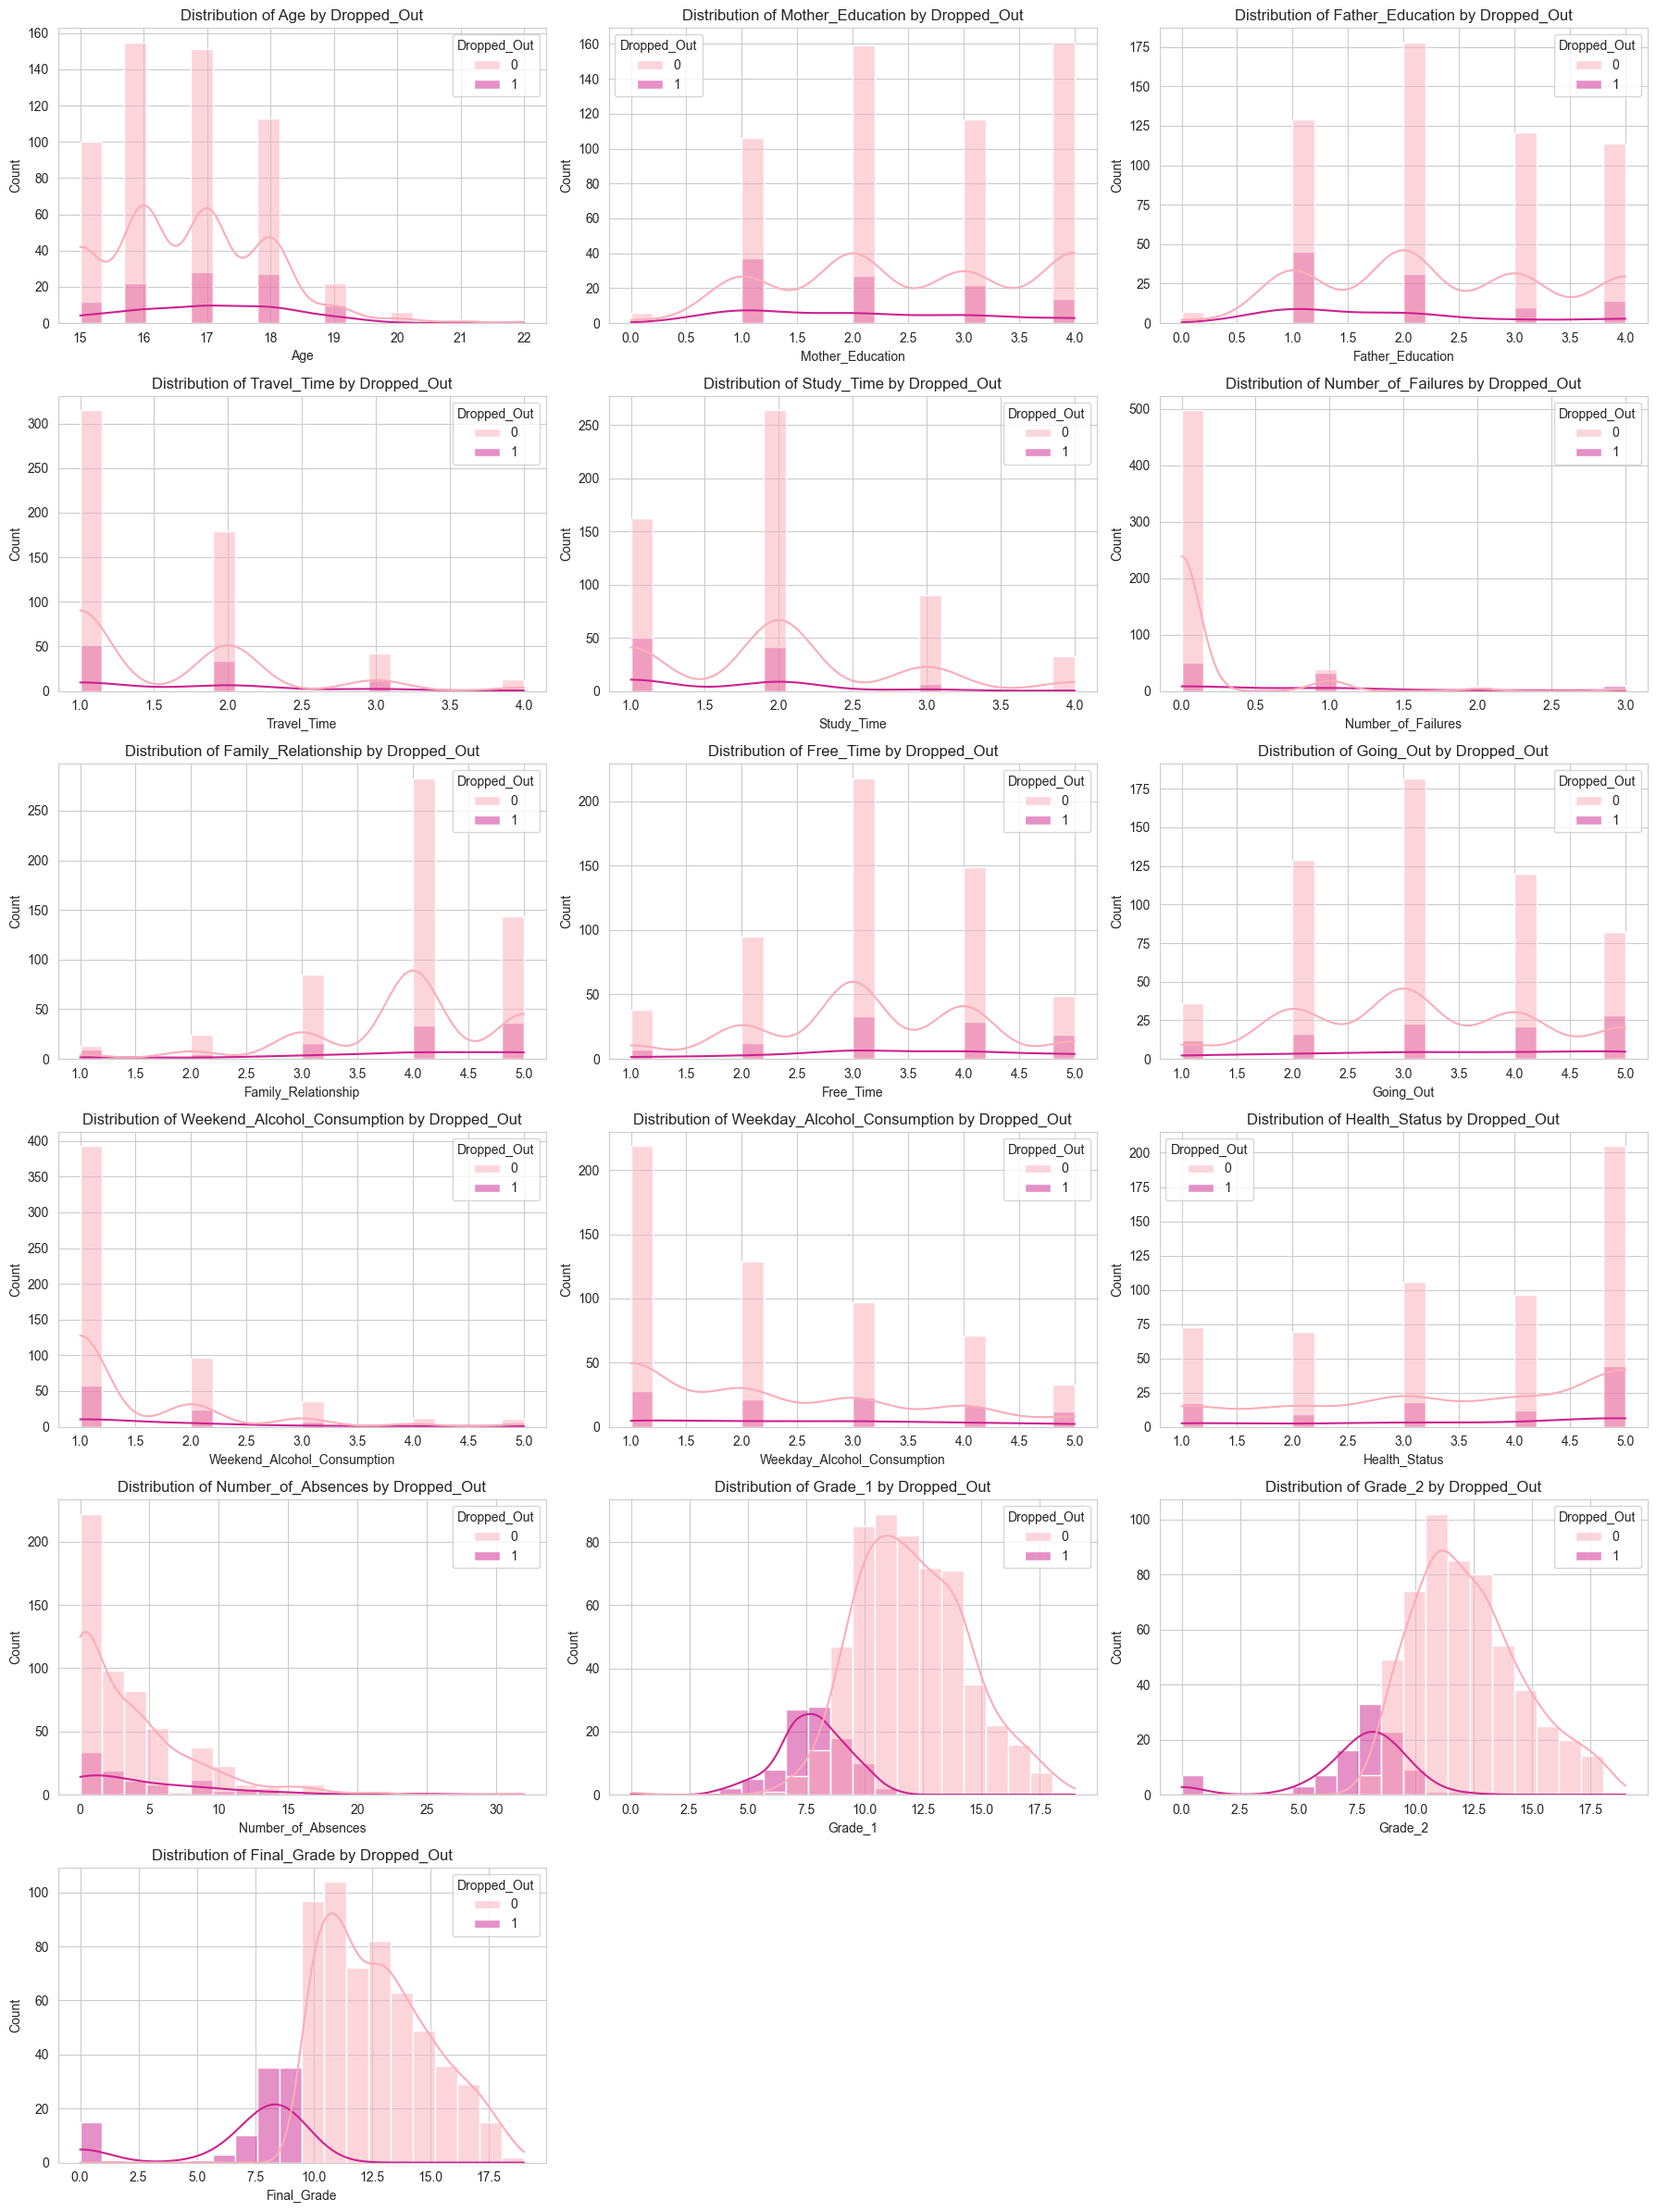

In [30]:

# Select numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = [col for col in numerical_columns if col != 'Dropped_Out']

# Create subplots
num_cols = len(numerical_columns)
fig, axes = plt.subplots(nrows=(num_cols // 3 + (num_cols % 3 > 0)), ncols=3, figsize=(18, 4 * (num_cols // 3 + 1)))
axes = axes.flatten()

# Loop through numerical columns and plot their distributions
for i, col in enumerate(numerical_columns):
    sns.histplot(data=data, x=col, hue="Dropped_Out", kde=True, palette="RdPu", ax=axes[i], bins=20)
    axes[i].set_title(f"Distribution of {col} by Dropped_Out")
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(col)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [33]:
from scipy.stats import f_oneway

# Function for ANOVA test
def anova_test(data, feature, target):
    groups = [data[data[target] == val][feature].values for val in data[target].unique()]
    f_stat, p_value = f_oneway(*groups)
    return p_value

# Test ANOVA for each numerical feature against the target
anova_p_values = {}
for col in numerical_columns:
    p_value = anova_test(data, col, 'Dropped_Out')
    anova_p_values[col] = p_value

anova_p_values = {k: v for k, v in sorted(anova_p_values.items(), key=lambda item: item[1])}
print(anova_p_values)

# Filter features with p-value < 0.05 (significant)
relevant_features = [col for col, p in anova_p_values.items() if p < 0.05]




{'Final_Grade': np.float64(1.8561798981604877e-83), 'Grade_2': np.float64(1.0848520931684683e-62), 'Grade_1': np.float64(1.478079774183599e-55), 'Number_of_Failures': np.float64(9.383797729341315e-24), 'Study_Time': np.float64(2.3660185264706287e-05), 'Father_Education': np.float64(0.00018497231006598202), 'Mother_Education': np.float64(0.00021447334647767843), 'Weekend_Alcohol_Consumption': np.float64(0.0016021830460606213), 'Weekday_Alcohol_Consumption': np.float64(0.0030185823705456555), 'Age': np.float64(0.004743603435770186), 'Free_Time': np.float64(0.01737229193923214), 'Number_of_Absences': np.float64(0.02583758471318448), 'Going_Out': np.float64(0.08696426205183291), 'Travel_Time': np.float64(0.14085267730864637), 'Family_Relationship': np.float64(0.2524427121803341), 'Health_Status': np.float64(0.7996951987534167)}


In [34]:
# Display relevant feature column names
print("Relevant features based on ANOVA p-values (p < 0.05):")
print(relevant_features)

Relevant features based on ANOVA p-values (p < 0.05):
['Final_Grade', 'Grade_2', 'Grade_1', 'Number_of_Failures', 'Study_Time', 'Father_Education', 'Mother_Education', 'Weekend_Alcohol_Consumption', 'Weekday_Alcohol_Consumption', 'Age', 'Free_Time', 'Number_of_Absences']


In [45]:
# List of relevant columns to keep
relevant_columns = [
    "Dropped_Out",
    "Age",
    "Number_of_Failures",
    "Weekend_Alcohol_Consumption",
    "Weekday_Alcohol_Consumption",
    "Number_of_Absences",
    "Study_Time",
    "Mother_Education",
    "Father_Education",
    "School",
    'Address', 
    'Mother_Job', 
    'Father_Job',
    'Reason_for_Choosing_School', 
    'Wants_Higher_Education', 
    'Internet_Access',
    'Final_Grade'
]

# Drop all other columns
df = data[relevant_columns]


In [46]:
df.dtypes

Dropped_Out                     int64
Age                             int64
Number_of_Failures              int64
Weekend_Alcohol_Consumption     int64
Weekday_Alcohol_Consumption     int64
Number_of_Absences              int64
Study_Time                      int64
Mother_Education                int64
Father_Education                int64
School                         object
Address                        object
Mother_Job                     object
Father_Job                     object
Reason_for_Choosing_School     object
Wants_Higher_Education         object
Internet_Access                object
Final_Grade                     int64
dtype: object

In [47]:
df.isna().sum()

Dropped_Out                    0
Age                            0
Number_of_Failures             0
Weekend_Alcohol_Consumption    0
Weekday_Alcohol_Consumption    0
Number_of_Absences             0
Study_Time                     0
Mother_Education               0
Father_Education               0
School                         0
Address                        0
Mother_Job                     0
Father_Job                     0
Reason_for_Choosing_School     0
Wants_Higher_Education         0
Internet_Access                0
Final_Grade                    0
dtype: int64

In [52]:
    # List of categorical columns to check
    categorical_columns = ['School', 'Address', 'Mother_Job','Father_Job', 'Reason_for_Choosing_School', 'Wants_Higher_Education', 'Internet_Access']
    
    # Loop through each column and display the unique values
    for col in categorical_columns:
        print(f"Unique values in '{col}':")
        print(data[col].unique())
        print("\n")


Unique values in 'School':
['GP' 'MS']


Unique values in 'Address':
['U' 'R']


Unique values in 'Mother_Job':
['at_home' 'health' 'other' 'services' 'teacher']


Unique values in 'Father_Job':
['teacher' 'other' 'services' 'health' 'at_home']


Unique values in 'Reason_for_Choosing_School':
['course' 'other' 'home' 'reputation']


Unique values in 'Wants_Higher_Education':
['yes' 'no']


Unique values in 'Internet_Access':
['no' 'yes']




#### encoding categorical features : 

In [54]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder with .loc to avoid the warning
df.loc[:, 'Wants_Higher_Education'] = label_encoder.fit_transform(df['Wants_Higher_Education'])
df.loc[:, 'Internet_Access'] = label_encoder.fit_transform(df['Internet_Access'])

# Display the transformed columns
print(df[['Wants_Higher_Education', 'Internet_Access']].head())


   Wants_Higher_Education  Internet_Access
0                       1                0
1                       1                1
2                       1                1
3                       1                1
4                       1                0


In [55]:

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['School', 'Address', 'Mother_Job', 'Father_Job', 'Reason_for_Choosing_School']

# Encode each column using LabelEncoder
for col in categorical_columns:
    df.loc[:, col] = label_encoder.fit_transform(df[col])

# Display the encoded columns
print(df[categorical_columns].head())


  School Address Mother_Job Father_Job Reason_for_Choosing_School
0      0       1          0          4                          0
1      0       1          0          2                          0
2      0       1          0          2                          2
3      0       1          1          3                          1
4      0       1          2          2                          1


In [57]:
    # List of categorical columns to check
    categorical_columns = ['School', 'Address', 'Mother_Job','Father_Job', 'Reason_for_Choosing_School', 'Wants_Higher_Education', 'Internet_Access']
    
    # Loop through each column and display the unique values
    for col in categorical_columns:
        print(f"Unique values in '{col}':")
        print(df[col].unique())
        print("\n")

Unique values in 'School':
[0 1]


Unique values in 'Address':
[1 0]


Unique values in 'Mother_Job':
[0 1 2 3 4]


Unique values in 'Father_Job':
[4 2 3 1 0]


Unique values in 'Reason_for_Choosing_School':
[0 2 1 3]


Unique values in 'Wants_Higher_Education':
[1 0]


Unique values in 'Internet_Access':
[0 1]




#### standarize the data 

In [58]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize all columns in the dataset
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the standardized data
print(df.head())


   Dropped_Out       Age  Number_of_Failures  Weekend_Alcohol_Consumption  \
0     -0.42679  1.031695           -0.374305                    -0.543555   
1     -0.42679  0.210137           -0.374305                    -0.543555   
2     -0.42679 -1.432980           -0.374305                     0.538553   
3     -0.42679 -1.432980           -0.374305                    -0.543555   
4     -0.42679 -0.611422           -0.374305                    -0.543555   

   Weekday_Alcohol_Consumption  Number_of_Absences  Study_Time  \
0                    -0.997695            0.073433    0.083653   
1                    -0.997695           -0.357863    0.083653   
2                     0.560678            0.504730    0.083653   
3                    -0.997695           -0.789159    1.290114   
4                    -0.218508           -0.789159    0.083653   

   Mother_Education  Father_Education    School   Address  Mother_Job  \
0          1.310216          1.540715 -0.730944  0.660182   -1.5564

In [59]:
# Vérifier les moyennes et les écarts types de chaque colonne
means = df.mean()
stds = df.std()

print("Moyennes de chaque colonne après standardisation:")
print(means)
print("\nÉcarts types de chaque colonne après standardisation:")
print(stds)
#moyennes proche de 0 et ecart-type proche de 1 

Moyennes de chaque colonne après standardisation:
Dropped_Out                    8.758616e-17
Age                           -1.751723e-16
Number_of_Failures             3.284481e-17
Weekend_Alcohol_Consumption   -3.284481e-17
Weekday_Alcohol_Consumption    7.937496e-17
Number_of_Absences             2.189654e-17
Study_Time                     9.579736e-17
Mother_Education              -1.094827e-16
Father_Education              -3.284481e-17
School                         0.000000e+00
Address                        1.532758e-16
Mother_Job                     5.474135e-17
Father_Job                     3.284481e-17
Reason_for_Choosing_School    -2.189654e-17
Wants_Higher_Education        -1.861206e-16
Internet_Access               -3.284481e-17
Final_Grade                    1.094827e-17
dtype: float64

Écarts types de chaque colonne après standardisation:
Dropped_Out                    1.000771
Age                            1.000771
Number_of_Failures             1.000771
Weekend_Alco

In [60]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Dropped_Out,649.0,8.758616e-17,1.000771,-0.426790,-0.426790,-0.426790,-0.426790,2.343075
Age,649.0,-1.751723e-16,1.000771,-1.432980,-0.611422,0.210137,1.031695,4.317929
Number_of_Failures,649.0,3.284481e-17,1.000771,-0.374305,-0.374305,-0.374305,-0.374305,4.686612
Weekend_Alcohol_Consumption,649.0,-3.284481e-17,1.000771,-0.543555,-0.543555,-0.543555,0.538553,3.784879
Weekday_Alcohol_Consumption,649.0,7.937496e-17,1.000771,-0.997695,-0.997695,-0.218508,0.560678,2.119051
Number_of_Absences,649.0,2.189654e-17,1.000771,-0.789159,-0.789159,-0.357863,0.504730,6.111583
Study_Time,649.0,9.579736e-17,1.000771,-1.122808,-1.122808,0.083653,0.083653,2.496576
Mother_Education,649.0,-1.094827e-16,1.000771,-2.218124,-0.453954,-0.453954,1.310216,1.310216
Father_Education,649.0,-3.284481e-17,1.000771,-2.098682,-1.188832,-0.278983,0.630866,1.540715
School,649.0,0.000000e+00,1.000771,-0.730944,-0.730944,-0.730944,1.368094,1.368094


In [67]:
# Afficher le maximum de chaque variable
max_values = df.max()

# Afficher le minimum de chaque variable
min_values = df.min()

# Afficher les résultats
print("-----------------------------------------------")
print("Valeurs maximales de chaque variable :")
print("-----------------------------------------------")
print(max_values)
print("\n")
print("-----------------------------------------------")

print("Valeurs minimales de chaque variable :")
print("-----------------------------------------------")
print(min_values)


-----------------------------------------------
Valeurs maximales de chaque variable :
-----------------------------------------------
Dropped_Out                    2.343075
Age                            4.317929
Number_of_Failures             4.686612
Weekend_Alcohol_Consumption    3.784879
Weekday_Alcohol_Consumption    2.119051
Number_of_Absences             6.111583
Study_Time                     2.496576
Mother_Education               1.310216
Father_Education               1.540715
School                         1.368094
Address                        0.660182
Mother_Job                     1.650334
Father_Job                     2.057248
Reason_for_Choosing_School     1.584651
Wants_Higher_Education         0.344914
Internet_Access                0.550648
Final_Grade                    2.197530
dtype: float64


-----------------------------------------------
Valeurs minimales de chaque variable :
-----------------------------------------------
Dropped_Out                   -0.

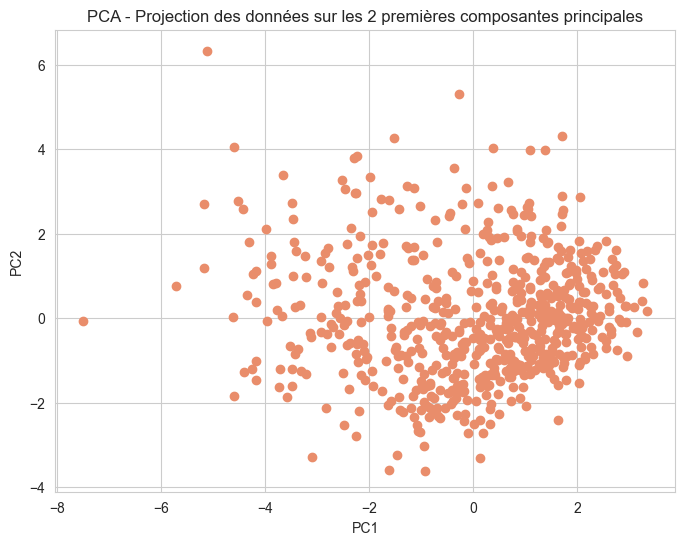

In [105]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Apply PCA
pca = PCA(n_components=2)  # You can adjust the number of components (2 for 2D visualization)
pca_result = pca.fit_transform(df)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Visualize the principal components (2D)
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title("PCA - Projection des données sur les 2 premières composantes principales")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()




In [106]:
# Display the principal components (weights of each variable in each component) in a matrix form
components_df = pd.DataFrame(pca.components_, 
                             columns=df.columns, 
                             index=[f"PC{i+1}" for i in range(pca.components_.shape[0])])

print("Composantes principales (coefficients de chaque variable pour chaque composante) :")
print(components_df)

Composantes principales (coefficients de chaque variable pour chaque composante) :
     Dropped_Out       Age  Number_of_Failures  Weekend_Alcohol_Consumption  \
PC1    -0.340630 -0.177713           -0.302043                    -0.137163   
PC2     0.169853  0.140708            0.153647                     0.436312   

     Weekday_Alcohol_Consumption  Number_of_Absences  Study_Time  \
PC1                    -0.119785           -0.062745    0.186852   
PC2                     0.436862            0.288379   -0.191537   

     Mother_Education  Father_Education    School   Address  Mother_Job  \
PC1          0.339309          0.300694 -0.280496  0.189605    0.252519   
PC2          0.286420          0.275105 -0.155311  0.137785    0.287713   

     Father_Job  Reason_for_Choosing_School  Wants_Higher_Education  \
PC1    0.114596                    0.136530                0.296341   
PC2    0.178952                    0.030609               -0.125578   

     Internet_Access  Final_Grade 

In [103]:
# Créer un tableau des valeurs propres pour les 2 premières composantes
eigenvalues_df = pd.DataFrame(pca.explained_variance_,
                               index=[f"PC{i+1}" for i in range(len(pca.explained_variance_))],
                               columns=["Valeur propre"])

# Afficher le tableau des valeurs propres pour les 2 premières composantes
print("Tableau des valeurs propres :")
print(eigenvalues_df)

# Créer un tableau pour la proportion de la variance expliquée par chaque composante
explained_variance_ratio_df = pd.DataFrame(pca.explained_variance_ratio_,
                                           index=[f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))],
                                           columns=["Proportion de la variance expliquée"])

print("\nProportion de la variance expliquée par chaque composante :")
print(explained_variance_ratio_df)

Tableau des valeurs propres :
     Valeur propre
PC1       3.374358
PC2       2.084455

Proportion de la variance expliquée par chaque composante :
     Proportion de la variance expliquée
PC1                             0.198186
PC2                             0.122426


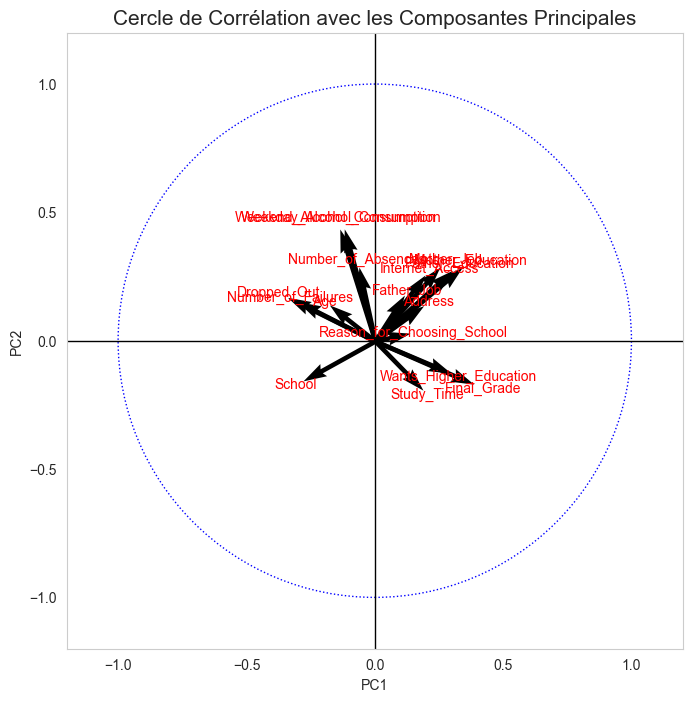

In [93]:

# Calculer la matrice des composantes principales (coefficients)
components = pca.components_

# Créer un DataFrame avec les composants principaux et les variables
corr_df = pd.DataFrame(components, columns=df.columns, index=['PC1', 'PC2'])

# Tracer le cercle de corrélation
plt.figure(figsize=(8, 8))

# Dessiner un cercle de rayon 1
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='dotted')
plt.gca().add_artist(circle)

# Tracer les flèches pour chaque variable
for i in range(len(df.columns)):
    plt.quiver(0, 0, corr_df.iloc[0, i], corr_df.iloc[1, i], angles='xy', scale_units='xy', scale=1)
    plt.text(corr_df.iloc[0, i] * 1.1, corr_df.iloc[1, i] * 1.1, df.columns[i], color='red', ha='center', va='center')

# Définir les limites des axes
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)

# Ajouter des labels et un titre
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.title("Cercle de Corrélation avec les Composantes Principales", fontsize=15)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()

# Afficher le graphique
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [91]:
print(pca.n_components_)
val=pca.explained_variance_
print(val)
print(sum(val))
print(pca.explained_variance_ratio_)


5
[3.37435805 2.08445518 1.3674378  1.3130764  1.06952001]
9.208847444761764
[0.19818581 0.12242608 0.08031358 0.07712077 0.062816  ]


éboulis des valeurs propre : L'éboulis des valeurs propres est un outil essentiel pour comprendre la structure des données dans le cadre d'une analyse en composantes principales (PCA). Il vous aide à déterminer combien de composantes principales garder en fonction de leur capacité à expliquer la variance des données, à identifier le bruit dans les données, et à prendre des décisions éclairées sur la réduction de dimension. Cela permet de simplifier le modèle tout en conservant les informations les plus pertinentes.

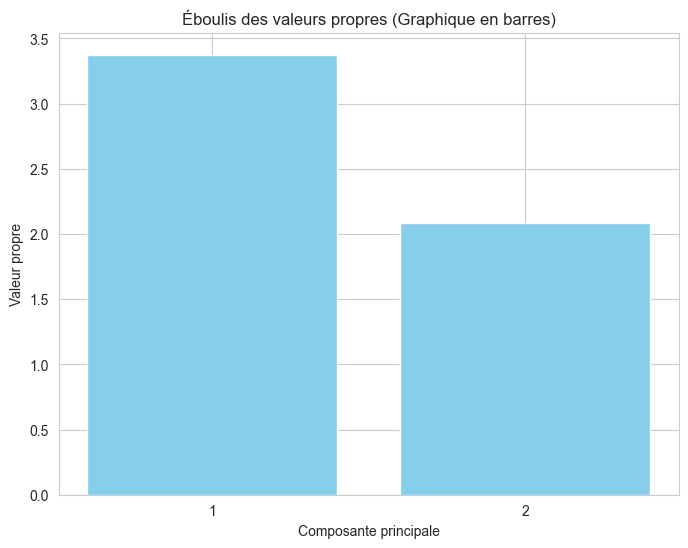

In [97]:
import matplotlib.pyplot as plt

# Récupérer les valeurs propres
eigenvalues = pca.explained_variance_

# Créer un graphique en barres
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, color='skyblue')
plt.title('Éboulis des valeurs propres (Graphique en barres)')
plt.xlabel('Composante principale')
plt.ylabel('Valeur propre')
plt.xticks(range(1, len(eigenvalues) + 1))  # Ajouter des étiquettes pour les composantes principales
plt.grid(True)
plt.show()


Le graphique montre une grande différence entre la première et la deuxième composante principale. La première composante (PC1) a une valeur propre beaucoup plus élevée que la deuxième (PC2). Cela suggère que la PC1 explique une grande proportion de la variance totale, tandis que la PC2 explique beaucoup moins de variance.

PC1 semble capturer la majorité de l'information dans vos données. Cela signifie que la première composante principale contient beaucoup d'information, ce qui en fait la plus significative en termes d'explication de la variance dans les données. Si vous décidiez de réduire le nombre de dimensions (par exemple en ne gardant que les deux premières composantes principales), vous pourriez perdre des informations, mais cela pourrait encore fournir une approximation raisonnable de la structure des données.

PC2 a une valeur propre bien plus faible, ce qui signifie que sa capacité à expliquer la variance est limitée par rapport à PC1.

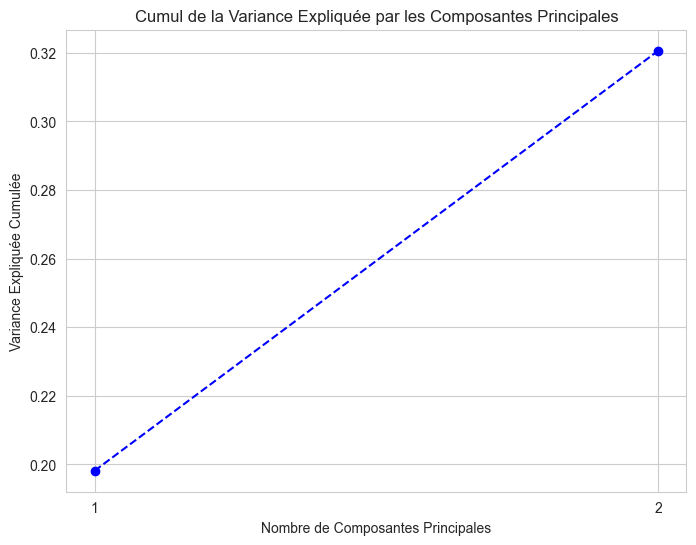

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Calculer la variance cumulée expliquée
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Créer un graphique
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='b', linestyle='--')

# Ajouter des labels et un titre
plt.title("Cumul de la Variance Expliquée par les Composantes Principales")
plt.xlabel("Nombre de Composantes Principales")
plt.ylabel("Variance Expliquée Cumulée")
plt.xticks(range(1, len(cumulative_variance) + 1))  # Afficher chaque composante

# Afficher le graphique
plt.grid(True)
plt.show()


La variance expliquée cumulée commence à 0.20 pour la première composante principale, ce qui signifie qu'environ 20% de la variance totale des données est expliquée par la première composante.
À la deuxième composante principale, la variance cumulée atteint 0.32, indiquant que les deux premières composantes expliquent ensemble environ 32% de la variance des données.
Cela suggère que l'ajout de chaque nouvelle composante principale augmente la capacité à expliquer la variance des données, mais dans ce cas, les deux premières composantes ne couvrent qu'environ 32% de la variance totale.

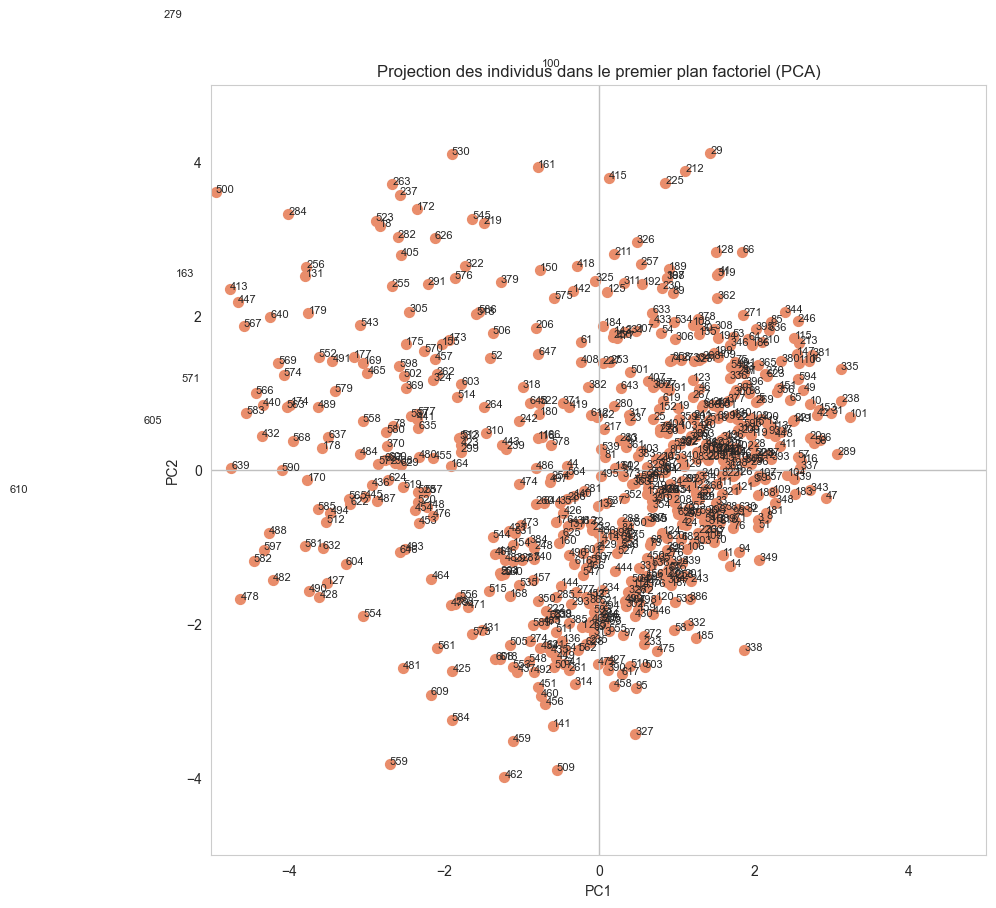

In [115]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

# Supposons que votre DataFrame est 'df', et que les variables que vous souhaitez analyser sont déjà dans ce DataFrame
# Exemple pour appliquer PCA sur les colonnes appropriées :
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)  # 'df' étant votre DataFrame avec les données brutes

# Création du DataFrame pour stocker les projections PCA
Y_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Visualisation des individus dans le premier plan factoriel
fig, axes = plt.subplots(figsize=(10, 10))
plt.scatter(Y_df.iloc[:, 0], Y_df.iloc[:, 1], s=50)  # Scatter plot des points
axes.set_xlim(-5, 5)  # Limites des axes X
axes.set_ylim(-5, 5)  # Limites des axes Y

# Ajouter les indices des points comme labels
for i in range(len(Y_df)):
    plt.text(Y_df.iloc[i, 0], Y_df.iloc[i, 1], str(i), fontsize=8)

# Tracer les axes principaux (ligne pour PC1 et PC2)
plt.plot([-5, 5], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-5, 5], color='silver', linestyle='-', linewidth=1)

# Désactiver la grille
plt.grid(False)

# Titre et affichage
plt.title("Projection des individus dans le premier plan factoriel (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Affichage du graphique
plt.show()


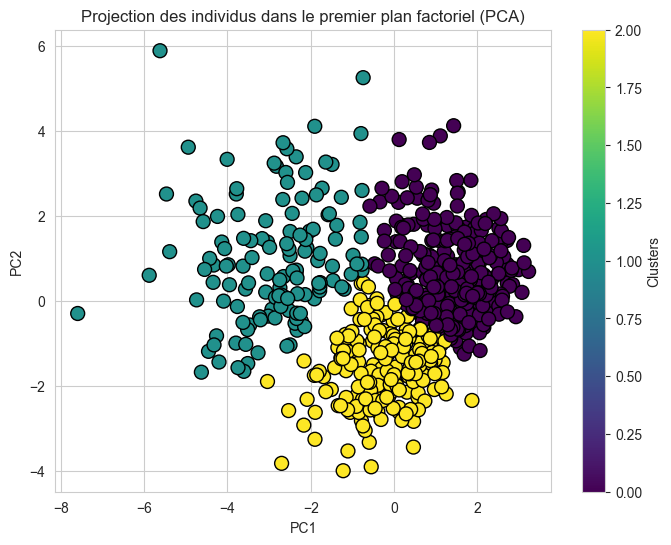

In [110]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Appliquer la PCA avec 2 composantes principales
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)  # Appliquer PCA aux données

# Créer un DataFrame avec les résultats des 2 premières composantes principales
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Appliquer KMeans pour créer des groupes (vous pouvez ajuster le nombre de clusters)
kmeans = KMeans(n_clusters=3)  # Exemple de 3 clusters
pca_df['Cluster'] = kmeans.fit_predict(pca_df)  # Ajouter les labels de clusters au DataFrame PCA

# Visualiser les individus dans le plan des 2 premières composantes principales
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', edgecolor='k', s=100)

# Ajouter des titres et labels
plt.title("Projection des individus dans le premier plan factoriel (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Clusters")  # Afficher une légende pour les groupes
plt.show()




In [111]:
# Afficher les centres des clusters
centers = kmeans.cluster_centers_
print("Centres des clusters :")
print(centers)

# Proposer une typologie des individus en fonction des clusters
print("Typologie des individus :")
for i in range(kmeans.n_clusters):
    print(f"Cluster {i+1}:")
    cluster_points = pca_df[pca_df['Cluster'] == i]
    print(f"Nombre d'individus : {len(cluster_points)}")
    print(cluster_points.describe())  # Affiche un résumé statistique pour chaque cluster
    print()

Centres des clusters :
[[ 1.39356318  0.64279336]
 [-2.85244868  0.97209806]
 [-0.21149383 -1.56438233]]
Typologie des individus :
Cluster 1:
Nombre d'individus : 306
              PC1         PC2  Cluster
count  306.000000  306.000000    306.0
mean     1.393563    0.642793      0.0
std      0.765727    0.973336      0.0
min     -0.577356   -1.251640      0.0
25%      0.859057   -0.066153      0.0
50%      1.420169    0.481533      0.0
75%      1.898653    1.292835      0.0
max      3.236326    4.115009      0.0

Cluster 2:
Nombre d'individus : 134
              PC1         PC2  Cluster
count  134.000000  134.000000    134.0
mean    -2.852449    0.972098      1.0
std      1.225270    1.446780      0.0
min     -7.599328   -1.676755      1.0
25%     -3.627239    0.028249      1.0
50%     -2.659058    0.815098      1.0
75%     -2.096883    1.857769      1.0
max     -0.739740    5.877517      1.0

Cluster 3:
Nombre d'individus : 209
              PC1         PC2  Cluster
count  209.000000 